# Wine Connoisseurs: Darius Ardales, Joshua Balcueva
# CSMODEL - S12

#Dataset Description

The two datasets used in this notebook are related to red and white variants of the Portuguese “Vinho Verde” wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The data was collected with the help of R Data Mining and several other data mining methods using a regression approach. The support vector machine model produced the best results.

The datasets were created using red and white wine samples. The data collected comprise of inputs on objectives tests (e.g. PH values), and the output is based on sensory data that was evaluated by atleast 3 wine experts. Each expert graded the wine quality from 0 (very bad) to 10 (excellent).



# *pandas* and *matplotlib*

* **`pandas`** is a software library for Python that is designed for data manipulation and data analysis. 
* **`matplotlib`** is a software libary for data visualization, which allows us to easily render various types of graphs. 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<ipython-input-33-37ca202fa028>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Reading The Dataset
> Each row in the dataset represents an observation of wine. Each column in the dataset represents the physicochemical test (e.g. pH Level, Alcohol) output for each observation, then it's respective quality which is rated by wine experts.
*   There are 1599 observations for red wine, and 4898 observations for white wine
*   The datasets will be combined and will have a total of 6497 rows and 13 columns
> Both datasets use the same 13 variables. The first 12 variables are the physicochemical properties (inputs) of each wine and and the 13th is their respective quality
1.   **color** - the most easily recognizable characteristics of wines, heavy wines generally have a deeper color
1.   **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2.   **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
1.   **citric acid** - found in small quantities, citric acid can add ‘freshness’ and flavor to wines
2.   **residual sugar** -  the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
1.   **chlorides** -  the amount of salt in the wine
1.   **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
2.   **total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
1.   **density** -  the density of water is close to that of water depending on the percent alcohol and sugar content
1.   **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
2.   **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
1.   **alcohol** - the percent alcohol content of the wine
2.   **quality** - based on the rating of the wine experts, a score between 0 and 10



In [34]:
red_df = pd.read_csv('wineQualityReds.csv')
red_df.shape

(1599, 13)

In [35]:
white_df = pd.read_csv('wineQualityWhites.csv')
white_df.shape

(4898, 13)

In [36]:
#merge red wine and white wine dataframe
merge_df = pd.concat([red_df, white_df])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB




# Data Cleaning


In [37]:
# Check the unique categorical values of color
color = merge_df['color'].unique()
print(color)

['red' 'white']


No multiple representations of the same categorical value has been found as there are no other colors than red and white. Other values are non-categorical.

In [38]:
# To review the data types of each variable
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


All datatypes are correct.

In [39]:
# Check if there are null values in the dataset
checkNull = merge_df.isnull().any()
print(checkNull)

color                   False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


No NaN values has been found.

In [40]:
# Check if there are duplicated rows
checkDup1 = merge_df.duplicated().any()
print("Before dropping duplicates: ", checkDup1)
# Drop the duplicates
wine_df = merge_df.drop_duplicates()
checkDup2 = wine_df.duplicated().any()
print("After dropping duplicates: ",checkDup2)

Before dropping duplicates:  True
After dropping duplicates:  False


There are duplicate data, therefore the duplicates will be dropped.

In [41]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 5320 non-null   object 
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality               5320 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


**After cleaning the merged dataset, 5320 observation remain**

# Exploratory Data Analysis


Based on the dataset, each variable describes the physicochemical measurements of each wine observation. However, the quality variable, is based on sensory data that was evaluated by atleast 3 wine experts. The quality variable serves as the output that is based on the input physicochemical measurements. Thus, there is a need for the quality variable to be expounded further.

### Question 1: Which kind of wine has the higher average quality grading?

In [42]:
mean_df = wine_df.groupby("color").agg({"quality": ["mean", "std"]})
mean_df.sort_values(("quality", "mean"), ascending=False)

quality          
           mean       std
color                    
white  5.854835  0.890683
red    5.623252  0.823578

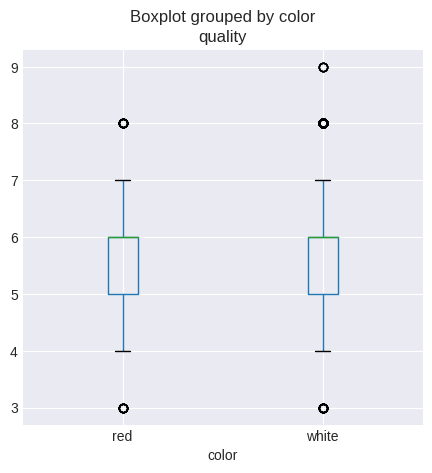

In [43]:
wine_df.boxplot("quality", by="color", figsize=(5, 5))
plt.show()

As seen above, the mean and standard deviations of both the red and the white wine are almost similar. However, white wine provides the higher average quality grading.

### Question 2: Does the dataset follow a normal distribution curve based on the quality of each wine?

In [44]:
# Explore the variable 'quality'
quality_info = wine_df['quality'].describe()
print(quality_info)

count    5320.000000
mean        5.795677
std         0.879772
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


Even though the wine quality ranges from 0 (very bad) to 10 (excellent), it can be seen that the minimum quality grading would be 3 and the maximum quality grading would be 9. With an average grade of 5.79. Looking at the mean and the std, it can be inferred here that the quality grading that occurs the most would be close to 5.79.

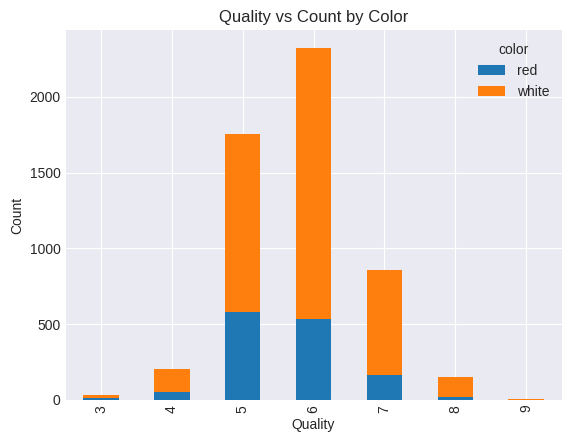

In [45]:
# Group the data by "color and quality", and count the occurrences for each unique 
# "color and quality" using ".size()"
# The index name will be set to count
groups = wine_df.groupby(['color', 'quality']).size().reset_index(name='count')
# separate the counts by color based on its quality
pivot = groups.pivot(index='quality', columns='color', values='count')
# display using a stacked bar graph
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality vs Count by Color')

plt.show()

The stacked bar graph for the quality vs count by color shows that both red and white wines follow a normal distribution curve with quality gradings 5 and 6 being the highest for both colors.

### Question 3: Which variable has the highest correlation towards quality?

In [46]:
# Get the correlation of each variable to quality
wine_corr = wine_df.corr()['quality']
print(wine_corr)

fixed acidity          -0.080092
volatile acidity       -0.265205
citric acid             0.097954
residual sugar         -0.056830
chlorides              -0.202137
free sulfur dioxide     0.054002
total sulfur dioxide   -0.050296
density                -0.326434
pH                      0.039733
sulphates               0.041884
alcohol                 0.469422
quality                 1.000000
Name: quality, dtype: float64


<ipython-input-46-0f2d1909ed7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_corr = wine_df.corr()['quality']


The series above shows all of the correlations of quality towards all of the numerical variables in the dataset.

In [47]:
# Get the variable with the maximum correlation to quality
wine_corr = wine_corr.drop('quality')
max_corr = wine_corr.idxmax()
print("Highest correlation: ", max_corr)

Highest correlation:  alcohol


The finding above states that alcohol level has the highest correlation towards wine quality.

Text(0.5, 1.0, 'Relationship of Quality and Alcohol Level')

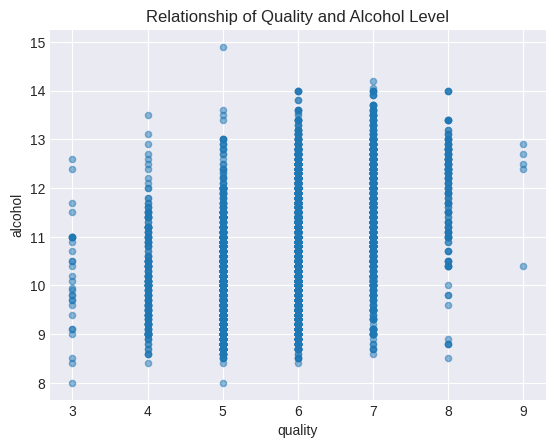

In [48]:
# Scatter plot for Quality vs Alcohol level
wine_df.plot.scatter(x='quality', y='alcohol', alpha=0.5)
plt.title('Relationship of Quality and Alcohol Level')

As seen in the scatter plot above for the relationship of quality and alcohol level, there is a positive correlation between quality and alcohol level.

### Question 4: Which color has the higher average alcohol level?

In [49]:
mean_df = wine_df.groupby("color").agg({"alcohol": ["mean", "std"]})
mean_df.sort_values(("alcohol", "mean"), ascending=False)

alcohol          
            mean       std
color                     
white  10.589358  1.217076
red    10.432315  1.082065

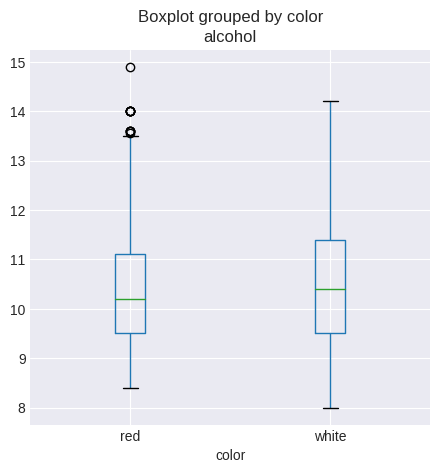

In [50]:
wine_df.boxplot("alcohol", by="color", figsize=(5, 5))
plt.show()

As can be seen in the findings above, white wine has a higher average alcohol level than red wine. With white wine having 10.58 while red wine having 10.43. Furthermore, white wine also has a higher upper quartile than red wine.

### Question 5: Which variable has the lowest correlation towards quality?

In [51]:
# Get the variable with the minimum correlation to quality
min_corr = wine_corr.idxmin()
print("Lowest correlation: ", min_corr)

Lowest correlation:  density


Text(0.5, 1.0, 'Relationship of Quality and Density')

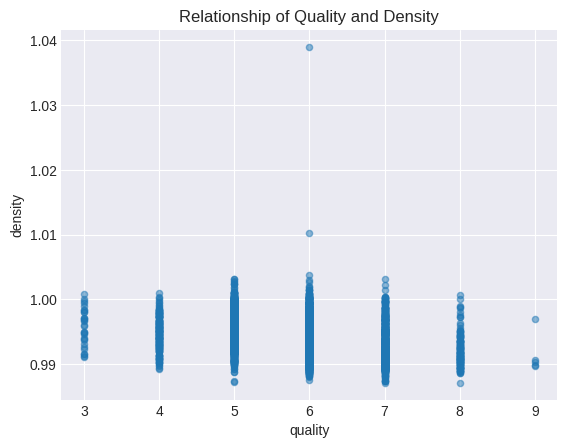

In [52]:
# Scatter plot for Quality vs Density
wine_df.plot.scatter(x='quality', y='density', alpha=0.5)
plt.title('Relationship of Quality and Density')

As seen in the scatter plot above for the relationship of quality and density, there is a negative correlation between quality and density.

### Question 6: Which color has the higher average density?

In [53]:
mean_df = wine_df.groupby("color").agg({"density": ["mean", "std"]})
mean_df.sort_values(("density", "mean"), ascending=False)

density          
           mean       std
color                    
red    0.996709  0.001869
white  0.993790  0.002905

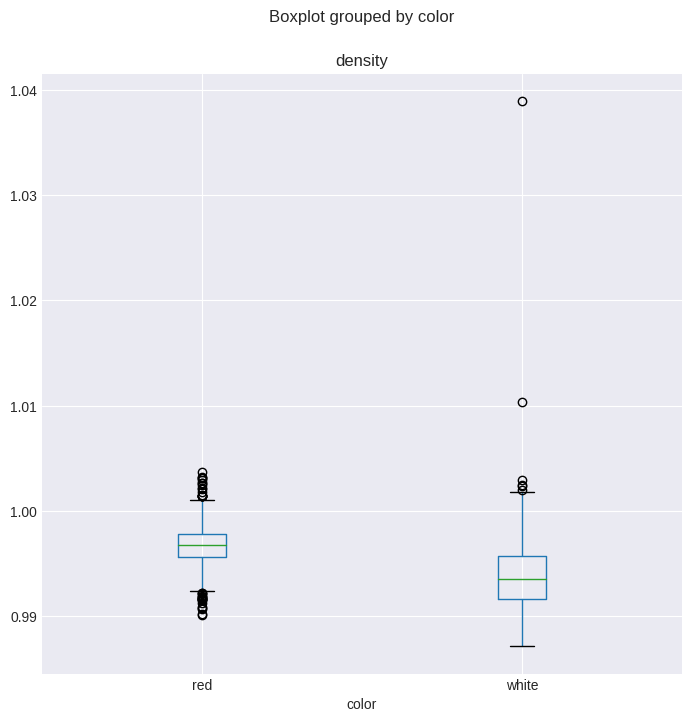

In [54]:
wine_df.boxplot("density", by="color", figsize=(8, 8))
plt.show()

As can be seen in the findings above, red wine has a higher average density than white wine. With red wine having 0.996 while white wine having 0.993. Furthermore, red wine also has a higher upper quartile than white wine.

# Research Question
**Is there a statistical difference in quality between red wine and white wine?**




*Relation to the Research Question*
> Based on the dataset, the quality of the wine is determined from all the physicochemical tests before it (e.g. pH level, density, alcohol level). By exploring and finding the correlation between each variable, we will be able to determine how it affects the quality of the wine. 

> Furthermore, through analyzing the visual representations of the correlations between the different variables and quality, it is shown that white wine would be more likely to receive a higher rating than red wine. However there is no statistical proof to support this claim. Therefore, the research question aims to discover if there is a statistical difference in quality between red wine and white wine.

*Scope of The Research Question*
> The research question is within the scope of dataset because it uses and involves all the data in the dataset. There is no data that is unutilized.

*Importance and Significance of the Research Question*
> The research question is both important and significant because it lets the company know which of their products is better so that they strategically promote it and get more customers. It also lets them know if they should further develop or manufacture the product.









# Data Modelling
### Pre-processing - Removing outliers
Removing outliers to avoid statistical inaccuracy in the results, as well as prevent the creation of clusters with less than the required amount of observations.

In [55]:
from scipy import stats

# Create a new dataframe with only the numeric columns
numcols = wine_df.select_dtypes(include=[np.number]).columns.tolist()
num_df = wine_df[numcols]

# Remove outliers using Z-score method
z_scores = stats.zscore(num_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_df = wine_df[filtered_entries]
filtered_df

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Pre-processing - Min Max Normalization
It will scale the data between 0 and 1 and help normalize the data.

In [56]:
# Library that can perform normalization on a dataframe
from sklearn.preprocessing import MinMaxScaler

# columns to normalize (not including color so start with 1)
col_normalize = filtered_df.columns[1:]

# use minmax scaler to normalize the dataset
scaler = MinMaxScaler()
filtered_df[col_normalize] = scaler.fit_transform(filtered_df[col_normalize])

filtered_df = filtered_df.reset_index()
filtered_df = filtered_df.drop(columns=['index'])
filtered_df

<ipython-input-56-6fffcf0e918c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col_normalize] = scaler.fit_transform(filtered_df[col_normalize])


,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,0.486111,0.810458,0.000000,0.072626,0.424051,0.121951,0.101449,0.690123,0.795699,0.447368,0.176991,0.25
1,red,0.541667,0.888889,0.054054,0.094972,0.525316,0.170732,0.173913,0.638476,0.526882,0.565789,0.247788,0.25
2,red,0.486111,0.758170,0.000000,0.067039,0.417722,0.146341,0.123188,0.690123,0.795699,0.447368,0.176991,0.25
3,red,0.555556,0.679739,0.081081,0.055866,0.379747,0.170732,0.192029,0.599742,0.569892,0.315789,0.176991,0.25
4,red,0.472222,0.745098,0.000000,0.033520,0.354430,0.170732,0.054348,0.483538,0.666667,0.328947,0.283186,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,white,0.319444,0.169935,0.391892,0.055866,0.189873,0.280488,0.311594,0.260168,0.537634,0.368421,0.495575,0.50
4865,white,0.375000,0.313725,0.486486,0.413408,0.240506,0.682927,0.586957,0.502905,0.408602,0.315789,0.212389,0.25
4866,white,0.361111,0.209150,0.256757,0.033520,0.202532,0.353659,0.380435,0.350549,0.236559,0.315789,0.176991,0.50
4867,white,0.222222,0.274510,0.405405,0.027933,0.082278,0.231707,0.376812,0.102001,0.612903,0.210526,0.778761,0.75


Since the k-Means algorithm is a distance-based algorithm, we need to normalize the dataset to ensure that each data is using the same scale and variance.

### Clustering using k-Means Algorithm
Get the best value for k first to know what is the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Number of clusters = 2, silhouette score = 0.26
Number of clusters = 3, silhouette score = 0.22
Number of clusters = 4, silhouette score = 0.17
Number of clusters = 5, silhouette score = 0.17
Number of clusters = 6, silhouette score = 0.17
Number of clusters = 7, silhouette score = 0.16
Number of clusters = 8, silhouette score = 0.15
Number of clusters = 9, silhouette score = 0.13
Number of clusters = 10, silhouette score = 0.12


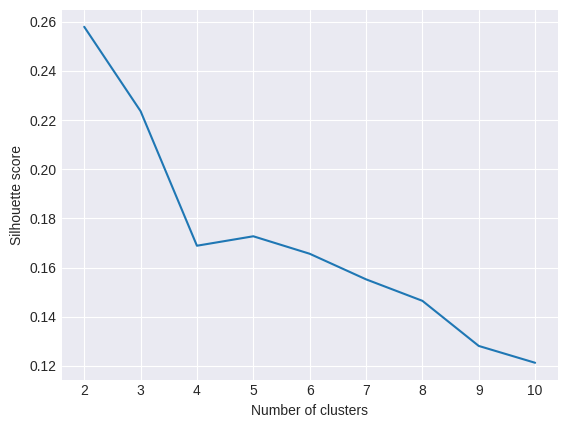

In [57]:
# getting best k-value
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Drop non-numeric columns
numcols = filtered_df.select_dtypes(include=np.number).columns.tolist()
num_df = filtered_df[numcols]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(num_df)

# Silhouette method to determine the optimal number of clusters
silhouette_scores = []
for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(standard_df, KMeans(n_clusters=n_cluster).fit_predict(standard_df)))
    
# Silhouette scores
for i, score in enumerate(silhouette_scores):
    print(f"Number of clusters = {i+2}, silhouette score = {score:.2f}")

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

The best K-value would be the one with the highest silhouette score. As seen in the plot, K=2 has the best silhouette score. Therefore, the k-Means algorithm will use k=2.

In [58]:
# k-Means Algorithm
from kmeans import KMeans
cluster_count = 2
kmeans = KMeans(cluster_count, 1, 13, 4869, filtered_df)
kmeans.initialize_centroids(filtered_df)

/content/kmeans.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.centroids = self.centroids.append(point, ignore_index=True)
/content/kmeans.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.centroids = self.centroids.append(point, ignore_index=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.430556,0.790850,0.0,0.072626,0.367089,0.475610,0.206522,0.696578,0.892473,0.776316,0.265487,0.25
1,0.555556,0.104575,1.0,0.963687,0.177215,0.621951,0.655797,0.819238,0.236559,0.250000,0.159292,0.25


Using train() from KMeans and assigning it to "groups" to represent the final clusters of each data point in the dataset. The function stops when: 
- The values of the centroids do not change.
- The clusters of each data point do not change.
- The maximum number of iterations is met.

In [59]:
groups = kmeans.train(filtered_df, 300)

/content/kmeans.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.groupby(['group'], as_index=False).mean()
/content/kmeans.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.groupby(['group'], as_index=False).mean()
/content/kmeans.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.groupby(['group'], as_index=False).mean()
/

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Done clustering!


/content/kmeans.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.groupby(['group'], as_index=False).mean()
/content/kmeans.py:140: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_data.groupby(['group'], as_index=False).mean()


Print the information about the clusters.

In [60]:
clusters = []
for i in range(cluster_count):
  x = filtered_df.loc[groups == i]
  clusters.append(x)

for i in range(cluster_count):
  print(clusters[i].info())
  print("red: ", len(clusters[i][clusters[i]["color"] == "red"]))
  print("white: ", len(clusters[i][clusters[i]["color"] == "white"]))
  print("-------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3464 entries, 0 to 4868
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 3464 non-null   object 
 1   fixed acidity         3464 non-null   float64
 2   volatile acidity      3464 non-null   float64
 3   citric acid           3464 non-null   float64
 4   residual sugar        3464 non-null   float64
 5   chlorides             3464 non-null   float64
 6   free sulfur dioxide   3464 non-null   float64
 7   total sulfur dioxide  3464 non-null   float64
 8   density               3464 non-null   float64
 9   pH                    3464 non-null   float64
 10  sulphates             3464 non-null   float64
 11  alcohol               3464 non-null   float64
 12  quality               3464 non-null   float64
dtypes: float64(12), object(1)
memory usage: 378.9+ KB
None
red:  1073
white:  2391
--------------------------------------------

# Statistical Inference
We set up our hypotheses as follows:

$H_0$ (null hypothesis): The true difference between the quality of red wine and white wine is 0.

$H_A$ (alternative hypothesis): The true difference between the quality of red wine and white wine is not 0.




### Hypothesis Testing - T-test using two sample means for each cluster

This code gets the probability values of each cluster using T-Test for Two Means, then prints their values.

In [61]:
from scipy.stats import ttest_ind

ttest_value = []

for i in range(cluster_count):
  value = ttest_ind(clusters[i][clusters[i]["color"] == "red"]["quality"], 
                    clusters[i][clusters[i]["color"] == "white"]["quality"], 
                    equal_var = False)
  ttest_value.append(value)


for i in range(cluster_count):
  print("Cluster ", i,"p-value: ", ttest_value[i][1])


Cluster  0 p-value:  5.32386669763585e-36
Cluster  1 p-value:  0.17471389447215943


# Insights and Conclusions
What can you conclude based on the $p$-value under a 5% significance level?


*   Cluster 0 has a p-value under 0.05 which means that it **rejects the null hypothesis** that the difference between red wine and white wine is 0.
*   Cluster 1 has a p-value above 0.05 which accepts the null hypothesis, but an argument as to why this result should not be put into consideration is because there is significantly less red wine observations in comparison to white wine in this cluster.



## Conclusion
> Therefore, The study rejects the null hypothesis at the 5% significance level. There is sufficient evidence to support the claim that there is a true difference between the quality of red wine and white wine.

## Insights


*   Based on the results of phase 1, white wine has better quality than that of red wine.



What were/ was your business question? 


> Which color of wine produced by the company has better quality? Depending on the results, market and support the wine which has better quality and further develop the other.

Why did you perform this test? Why this test specifically? 


> T-test using two sample means was specifically used for this study. This is because this test determines if there is a significant difference between the means of two independent groups. In this case, it was used to determine if there is a significant difference in the quality of red wine and white for each cluster.


What model did you choose and why is this model significant to your study? 


> The study used clustering using k-Means algorithm as its data modelling technique. This model was chosen mainly because of the structure of the dataset which is its physicochemical properties, the quality, and the color. Since the study aims to identify which wine has better overall quality, their quality scores was tested. However, there are many variables to still consider such as its physicochemical properties. In order to reduce the variability, clustering the dataset grouped similar observations together based on their physicochemical properties, which helped in identifying patterns and relationships in the data. In this case, clustering identified if there are distinct groups of red and white wine based on their physicochemical properties and quality ratings, and if there are different or consistent test results for each cluster.


What is/ are the recommendation/s? Did your recommendation answer your business question? 
> Yes. The study answered the question and shows that white wine, during this period of time in the company, is better than their red wine.

> When making a study such as this, it is important to use a dataset with a more or less equal amount of observations for better and more proper comparisons.


